# IIC-2433 Minería de Datos UC

- Versiones de librerías, python 3.8.10

- numpy 1.20.3
- sklearn 1.0.2
- matplotlib 3.5.2
- scipy 1.8.0

### Vamos a crear un dendrograma con 50 muestras

In [1]:
from sklearn import datasets
digits = datasets.load_digits()
X = digits.data[:50,]
y = digits.target[:50,]

In [2]:
from sklearn import preprocessing

min_max_scaler = preprocessing.MinMaxScaler()
X = min_max_scaler.fit_transform(X)

### Vamos a probar las 4 distancias de clustering aglomerativo

In [3]:
from sklearn.cluster import AgglomerativeClustering

# setting distance_threshold=0 ensures we compute the full tree.
hac1 = AgglomerativeClustering(linkage='single', n_clusters=10)
hac1 = hac1.fit(X)

hac2 = AgglomerativeClustering(linkage='average', n_clusters=10)
hac2 = hac2.fit(X)

hac3 = AgglomerativeClustering(linkage='complete', n_clusters=10)
hac3 = hac3.fit(X)

hac4 = AgglomerativeClustering(linkage='ward', n_clusters=10)
hac4 = hac4.fit(X)

### Y calculamos el Silhouette para ver cual funcionó mejor

In [4]:
from sklearn.metrics import silhouette_score

print(silhouette_score(X, hac1.labels_, metric="euclidean",))
print(silhouette_score(X, hac2.labels_, metric="euclidean",))
print(silhouette_score(X, hac3.labels_, metric="euclidean",))
print(silhouette_score(X, hac4.labels_, metric="euclidean",))

0.22744808295646707
0.2660735260395983
0.2515476758694331
0.2636844668119454


### Nos quedamos con average link

In [5]:
from sklearn.cluster import AgglomerativeClustering

# setting distance_threshold=0 ensures we compute the full tree.
hac = AgglomerativeClustering(distance_threshold=0, linkage='average', n_clusters=None)
hac = hac.fit(X)

Ver más configuraciones de hac en: https://scikit-learn.org/stable/modules/generated/sklearn.cluster.AgglomerativeClustering.html#sklearn.cluster.AgglomerativeClustering

### Ahora vamos a visualizar el dendrograma

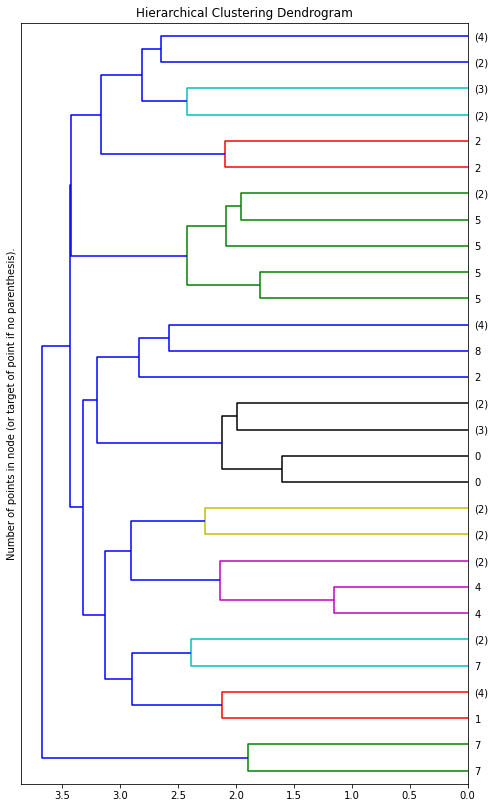

In [6]:
import numpy as np

from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram

def plot_dendrogram(model, **kwargs):

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0]) 
    n_samples = len(model.labels_) # model.labels_: cluster labels for each point
    for i, merge in enumerate(model.children_): 
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples] # in-order enumeration of nodes
        counts[i] = current_count

    linkage_matrix = np.column_stack([model.children_, model.distances_, counts]).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)

plt.figure(figsize=(8, 14))
plt.title("Hierarchical Clustering Dendrogram")
# plot the top three levels of the dendrogram
plot_dendrogram(hac, truncate_mode="level", p=5, labels=y, orientation = 'left')
plt.ylabel("Number of points in node (or target of point if no parenthesis).")
plt.show()